In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/My\ paper

/content/drive/Shareddrives/My paper


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('./Customer Value Prediction/TABLES/Handcrafted Features.csv')

In [ ]:
cols = ['Lifespan_days', 'CAI', 'Monetary', 'Recency', 'Frequency', 'ActiveDays', 'PromotionUsedRate', 'CompleteOrders', 'ReturnRate']

In [ ]:
len(data)

83931

In [ ]:
data[cols].describe()

,Lifespan_days,CAI,Monetary,Recency,Frequency,ActiveDays,PromotionUsedRate,CompleteOrders,ReturnRate
count,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000,83931.000000
mean,717.410897,-0.071480,1121.678330,356.404904,1.161585,13.005373,0.427212,2.520928,0.290478
std,533.369159,0.187228,1084.083794,331.655615,1.644036,24.066124,0.420177,3.002263,0.392283
min,0.000000,-1.000000,-4580.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,265.000000,-0.208853,0.000000,129.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,598.000000,0.000000,1280.000000,257.000000,1.000000,6.000000,0.333333,2.000000,0.000000
75%,1114.000000,0.000000,1780.000000,466.000000,1.000000,13.000000,1.000000,3.000000,0.500000
max,2815.000000,0.775902,18359.000000,2404.000000,93.000000,363.000000,1.000000,184.000000,2.000000


In [ ]:
data[data['VIP']==1][cols].describe()

,Lifespan_days,CAI,Monetary,Recency,Frequency,ActiveDays,PromotionUsedRate,CompleteOrders,ReturnRate
count,11198.000000,11198.000000,11198.000000,11198.000000,11198.000000,11198.000000,11198.000000,11198.000000,11198.000000
mean,830.664851,-0.044970,1507.769931,233.903822,2.399804,29.157439,0.479266,4.872745,0.253503
std,562.193251,0.233842,1098.947536,266.451044,3.340506,41.631643,0.366803,6.114633,0.328088
min,0.000000,-0.653834,-860.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,334.000000,-0.222222,843.500000,60.000000,1.000000,6.000000,0.000000,2.000000,0.000000
50%,768.000000,0.000000,1506.416667,149.000000,1.000000,14.000000,0.500000,3.000000,0.000000
75%,1257.000000,0.043402,2020.687500,308.000000,3.000000,34.000000,0.800000,6.000000,0.500000
max,2724.000000,0.775902,14474.500000,2307.000000,93.000000,358.000000,1.000000,184.000000,2.000000


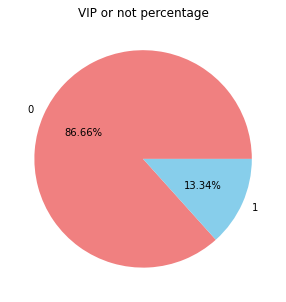

In [ ]:
plt.figure( figsize=(10,5) )
data['VIP'].astype(int).value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'VIP or not percentage' )  # 圖標題
plt.ylabel( '' )
plt.show()

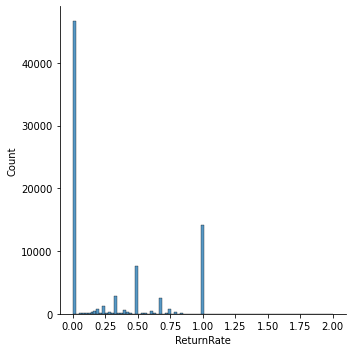

In [ ]:
sns.displot(data, x="ReturnRate")

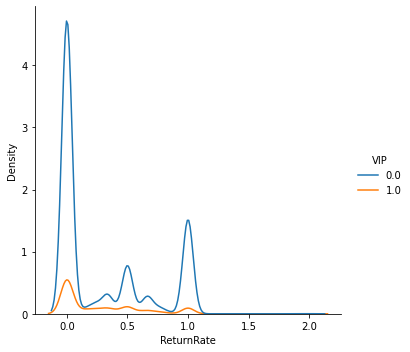

In [ ]:
sns.displot(data, x="ReturnRate", hue="VIP", kind="kde")

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'TotalSalesAmount in log10')

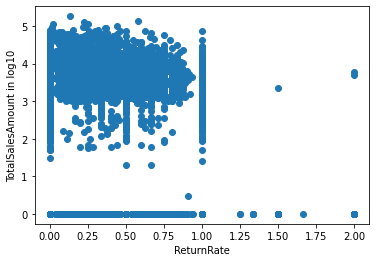

In [ ]:
plt.scatter(data['ReturnRate'], np.log10(data['TotalSalesAmount'].replace(0, 1)))
plt.xlabel('ReturnRate')
plt.ylabel('TotalSalesAmount in log10')

In [ ]:
cols = ['Lifespan_days', 'CAI', 'Monetary', 'Recency', 'Frequency', 'ActiveDays', 'PromotionUsedRate', 'CompleteOrders', 'ReturnRate', 
        'TotalSalesAmount', 'Active', 'VIP']

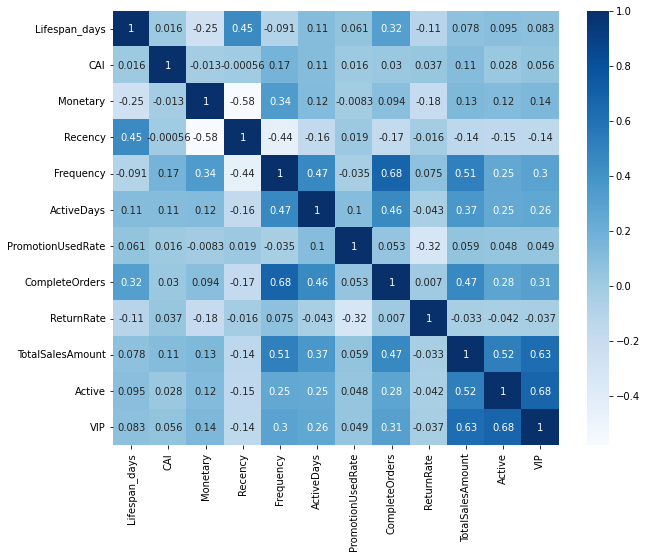

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data[cols].corr(), cmap='Blues', annot=True)
plt.show()

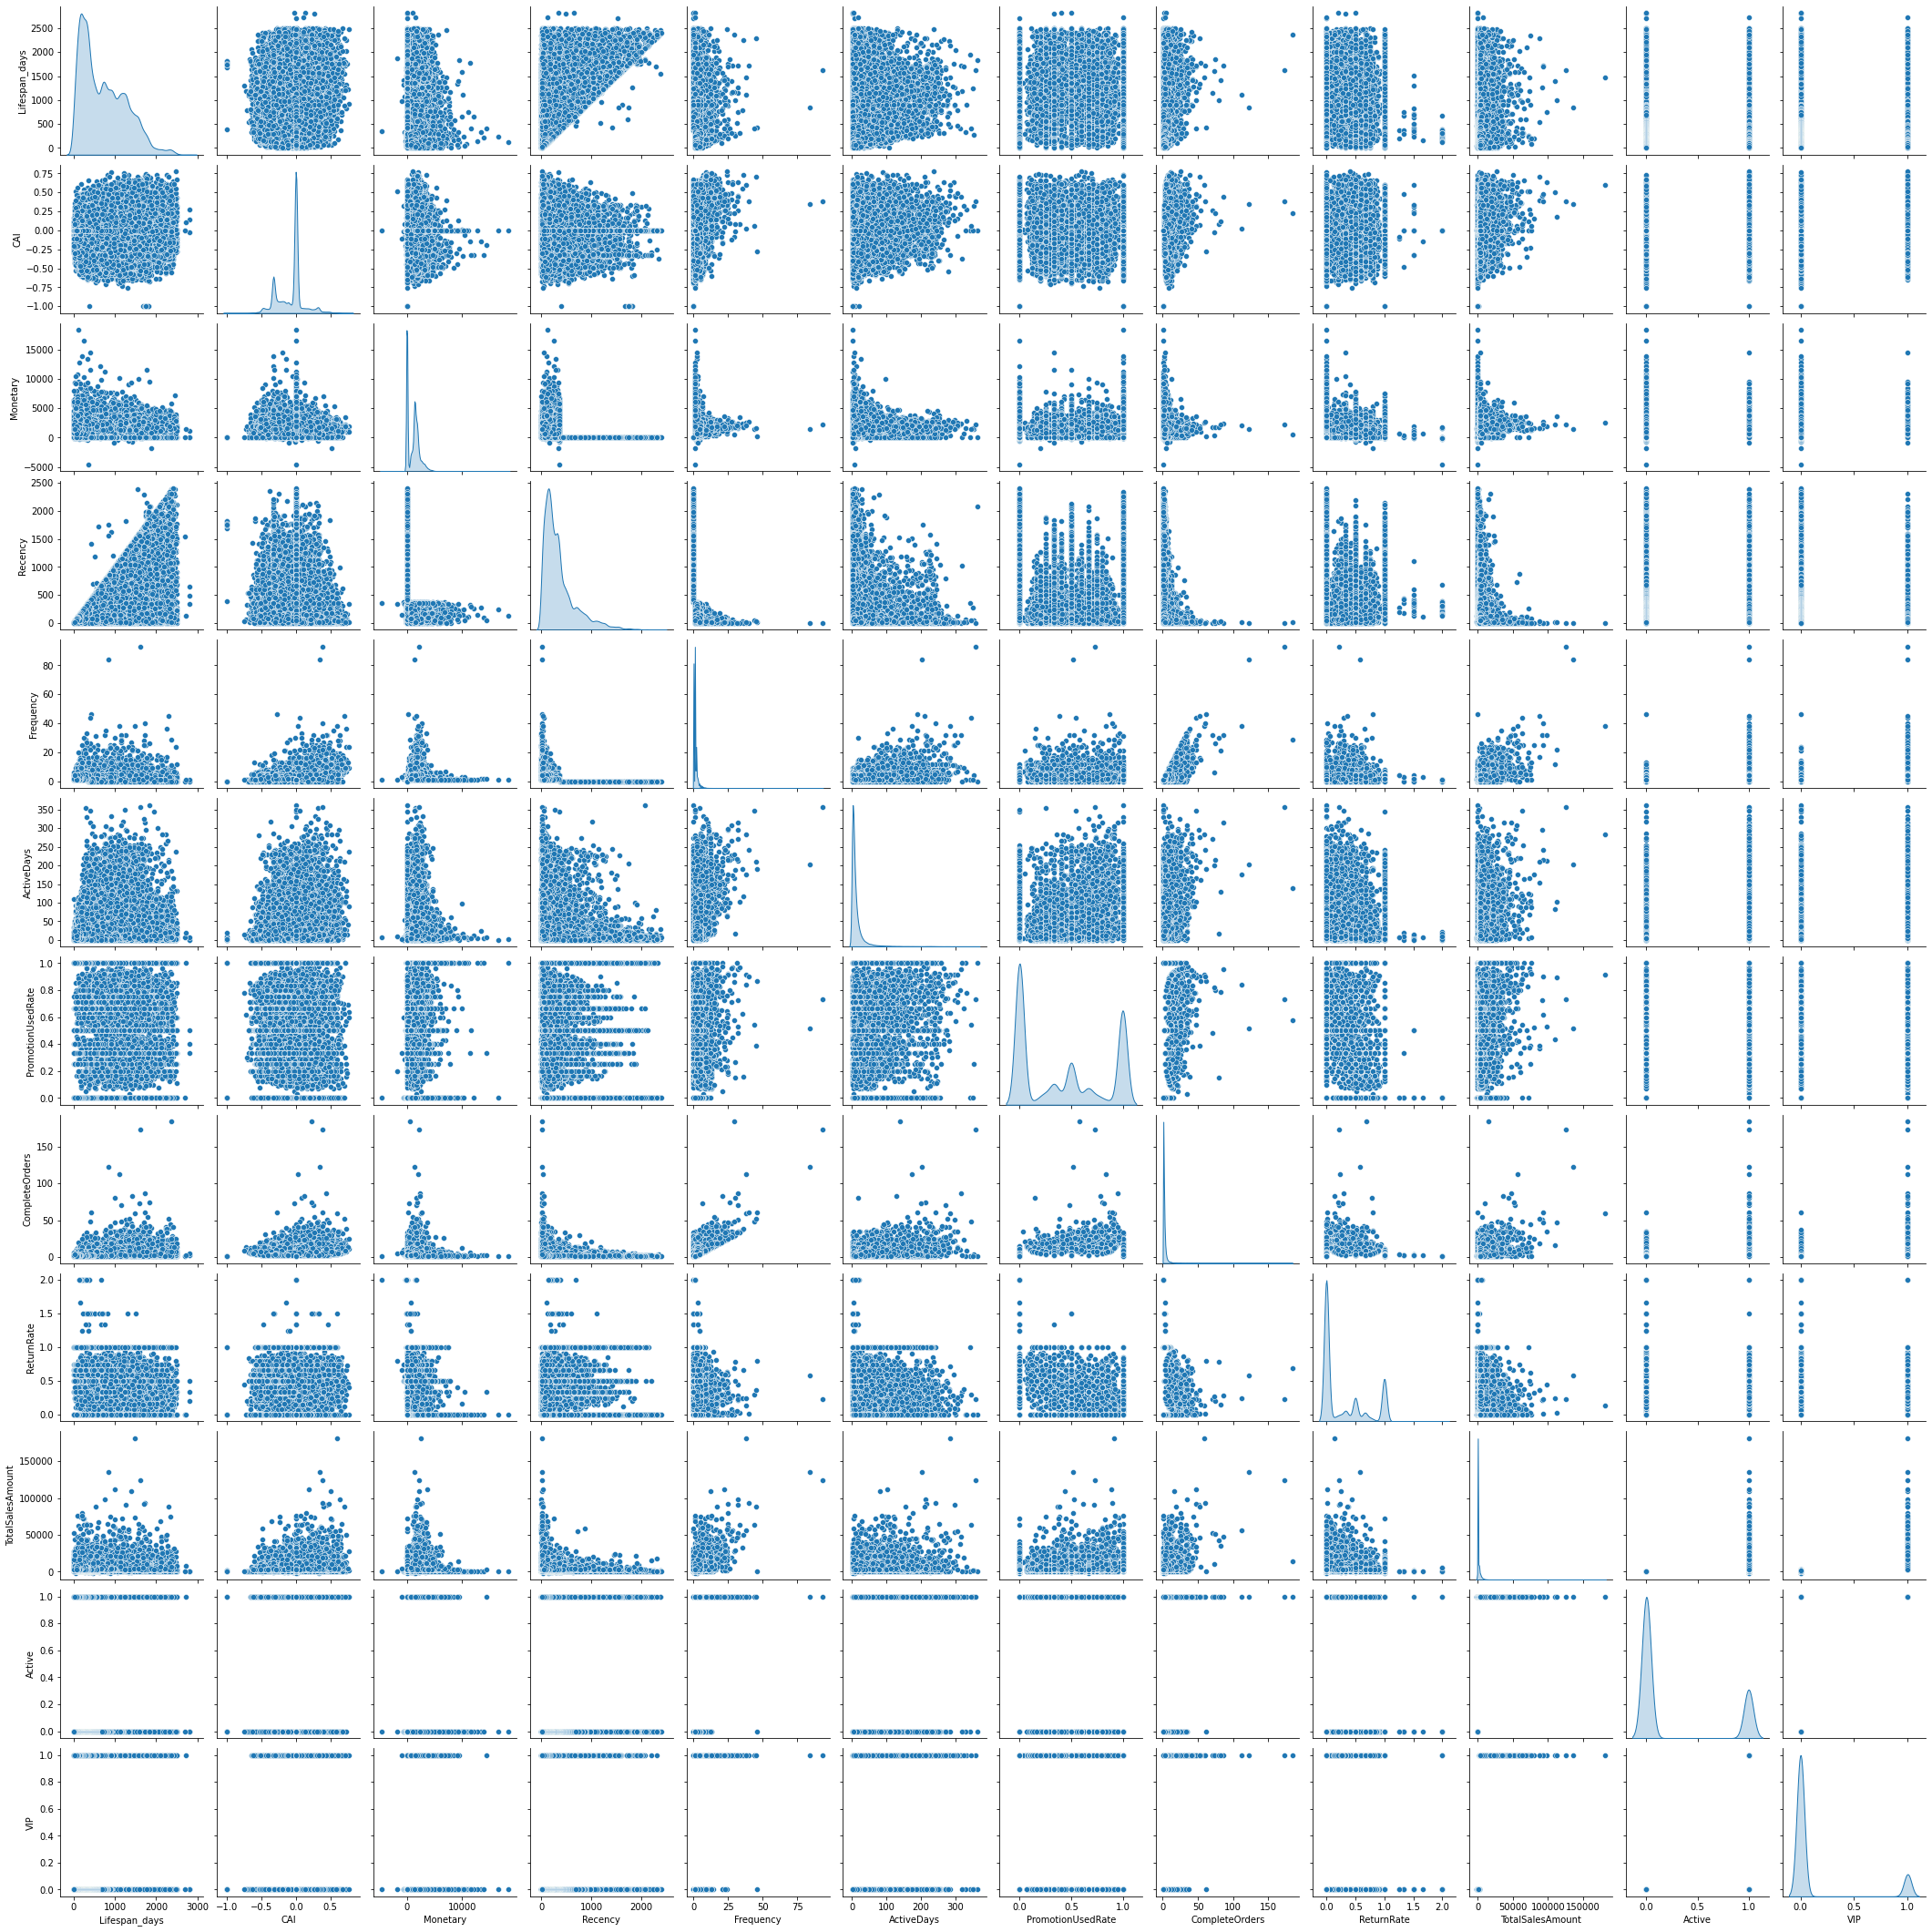

In [ ]:
sns.pairplot(data[cols], diag_kind='kde')

In [ ]:
import statsmodels.api as sm
from scipy import stats

X = data[cols].drop(['TotalSalesAmount', 'Active', 'VIP'], axis=1)
y = data['VIP']

In [ ]:
X_cons = sm.add_constant(X)
model = sm.OLS(y, X_cons)
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    VIP   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1406.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        07:54:06   Log-Likelihood:                -22661.
No. Observations:               83931   AIC:                         4.534e+04
Df Residuals:                   83921   BIC:                         4.544e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0090      0.00